#  Predicting Spotify Song Popularity with PyTorch

## Introduction
In this project, our aim is to build a machine learning model that can predict the popularity score (on a scale of 0 to 100) of songs on Spotify, based on their audio features. Instead of using traditional machine learning models such as linear regression or decision trees, we are implementing our solution using PyTorch, a powerful and flexible deep learning framework. The deep learning models built with PyTorch offer significant advantages like
- Flexibility and control: PyTorch allows us to design custom model architectures and training loops like customize layers and activation functions, add regularization, experiment with different loss functions and learning rates.
- Non-linear modeling capability: Neural networks can capture complex relationships between audio features and popularity that simple models might miss.
- Scalability and performance: With GPU support and industry-level optimization tools, PyTorch models can scale efficiently with data size and  complexity.
- Real-world relevance: PyTorch is widely used in both industry and research, making this project highly practical and transferable to real-world applications.
- Improved performance with tuning: Techniques like early stopping and learning rate scheduling

Our project consists of following parts:
1. **Load & preprocess** the dataset in PyTorch.
2. **Define neural networks** in PyTorch to predict popularity from audio features.
3. **Train** the model using a regression loss function (MSELoss).
4. **Evaluate** the model’s performance using RMSE or MAE.
5. **Experiment** with different architectures, optimizers, and hyperparameters to improve accuracy.
6. **Document** the process, findings, and best-performing model.

## Load & preprocess

In this stage, we begin by importing all the necessary libraries and loading the dataset. We then perform an initial examination of the data to check for missing values, duplicate rows, and any other potential data quality issues. After addressing these, we clean and preprocess the dataset to ensure it is ready for modeling.

Next, we conduct exploratory data analysis (EDA) to gain insights into the distribution of features, identify patterns or correlations, and better understand the relationship between audio features and song popularity.

Finally, we split the cleaned dataset into training and test sets to prepare for building and evaluating our machine learning model.

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pytorch_tabnet.tab_model import TabNetRegressor
import matplotlib.pyplot as plt

In [2]:
#Load the data into a variable df
df=pd.read_csv('SpotifyFeatures.csv')
display (df)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

The dataset consists of 232,725 entries and 18 columns, each representing various features of songs sourced from Spotify. The columns are:
- genre:Genre classification of the song
- artist_name:Name of the performing artist
- track_name:Title of the song
- track_id:Unique identifier for each track
- popularity:Target variable, Spotify popularity score (0–100)
- acousticness:Confidence measure of whether the track is acoustic
- danceability:How suitable the track is for dancing
- duration_ms:Track duration in milliseconds
- energy:Intensity and activity level of the track
- instrumentalness: Prediction of whether the track contains vocals
- key:Estimated key of the track
- liveness:Presence of an audience in the recording
- loudness:Overall loudness of the track in decibels
- mode:Modality of the track (major/minor)
- speechiness:Presence of spoken words in the track
- tempo:Estimated tempo in beats per minute (BPM)
- time_signature:Estimated time signature
- valence:Musical positiveness or mood of the track

In [4]:
# Drop rows with missing values 
df = df.dropna()

In [5]:
#Recheck for missing values
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Upon inspection, we found that one track_name entry was missing. Since this information is essential for identifying the track, we decided to remove the corresponding row from the dataset. After dropping this row, we re-checked for missing values across all columns and confirmed that the dataset is now completely free of missing data.

In [6]:
#Check for duplicated track_ids
df['track_id'].duplicated().value_counts()

track_id
False    176773
True      55951
Name: count, dtype: int64

In [7]:
#Drop duplicate rows keeping the first occurrence
df = df.drop_duplicates(subset='track_id', keep='first')

From the above, we observed that the track_id column contained 55,951 duplicate entries, indicating that several songs were repeated in the dataset. To ensure each track appears only once, we removed the duplicates by retaining only the first occurrence of each track_id. As a result, the dataset was reduced to 176,773 unique entries, each representing a distinct song.

In [8]:
# Check whether the popularity score contains valid(0 to 100) values
invalid_popularity_values = df[(df['popularity'] < 0) | (df['popularity'] > 100)]
print(f"Number of invalid popularity scores: {len(invalid_popularity_values)}")

Number of invalid popularity scores: 0


In [9]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

Here, we validate the popularity column to ensure all values fall within the expected range of 0 to 100, as defined by Spotify’s scoring system. We found that all values are within this range, and there are no invalid or outlier entries in the popularity column.

Next step is we want to describe the the features and target. The following features capture the musical structure of a track:
- mode: Indicates whether the song is in a major or minor key (categorical).
- time_signature: Represents the rhythmic structure or beats per measure.
- key: Specifies the musical key of the song

These features may not directly link a song to be popular (unlike tempo, energy, liveness or danceability), they can still carry  patterns that influence how a listener feels about a song and that, in turn, may affect its popularity.
For eg, Songs in major mode often feel happier, while minor songs feel sadder or more emotional. Certain moods might be more popular depending on trends or genres.So these features are not strong predictors on their own, can combine with other features to give the model a richer understanding of a track's musical composition which might affect song's popularity. Since these are categorical variables, we convert them into a numerical format using one-hot encoding before feeding them into the model.

In [10]:
# Target column
target = 'popularity'

# Categorical features to encode
categorical_features = ['mode', 'time_signature', 'key']

# One-hot encode categorical features 
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [11]:
#Drop columns not included as features
exclude_cols = ['genre', 'artist_name', 'track_name', 'track_id', 'popularity']
# Select all columns except the exclude list
features= df.columns.drop(exclude_cols).tolist()
# Final feature matrix and target array
X = df[features].values.astype(np.float32)  # Features
y = df[target].values.astype(np.float32)

In [12]:
X.shape

(176773, 26)

In [13]:
y.shape

(176773,)

In [14]:
# Scaling using Standard Scaler
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)

Standardization scales features to have a mean of 0 and standard deviation of 1, ensuring all features contribute equally during training.
It's especially important for neural networks, as it helps:
- Improve training speed and stability
- Prevent feature dominance due to scale differences
- Ensure better performance with gradient-based optimizers
This step is essential for achieving balanced and efficient learning in deep learning models.

In [15]:
#Train test splitting
X_train, X_temp, y_train, y_temp = train_test_split(Scaled_X, y, test_size=0.4, random_state=12345)

# Second split: Validation and Test Set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12345
)

Splits the standardized features (Scaled_X) and target (y) into training, validation and test sets.
- 60% of the data is used for training (X_train, y_train), 20% is  for validation (X_val, y_val) and 20% is reserved for testing (X_test, y_test).
The random_state ensures the split is reproducible.

In [16]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

The above steps converts the data into PyTorch tensors. Data must be tensors to work with PyTorch models and using dtype=torch.float32 because neural networks expect float inputs, especially for regression targets.

In [17]:
# Wrap in TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

Combines features (X) and targets (y) into a single dataset object.

In [18]:
# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

DataLoader wraps the dataset and allows load data in batches. Here we use 64 samples per batch.Batching helps with efficient training and reduces memory use. Also, shuffle the training data each epoch (shuffle=True) for better generalization. For the test data and validation data, shuffling is disabled (shuffle=False) to keep evaluation consistent.

## Define neural networks 

At this stage, define and compare different neural network architectures, such as feedforward and deep neural networks. Use a linear regression model as the baseline for performance comparison.

In [19]:
# Linear Regression Model (Baseline Model)
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  

    def forward(self, x):
        return self.linear(x)

Linear Regression model defines a single fully connected (linear) layer, mapping input_dim inputs to 1 output, representing the predicted target (popularity). Used as a baseline model, no hidden layers and activation functions, single linear transformation model.

In [20]:
# Feedforward Neural Network
# A basic neural network with one hidden layer.
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  
        )

    def forward(self, x):
        return self.model(x)

This class defines a basic feedforward neural network for regression using PyTorch. It consists of an input layer that feeds into a hidden layer with 32 neurons, followed by a ReLU activation function to introduce non-linearity, and a final output layer that produces a single value output. The workflow shown below:

Input (e.g., features) --- Linear(input_dim - 32) --- ReLU -  Linear(32 - 1) --- Output (popularity
)

In [21]:
#Deep Neural Network
class DeepNN(nn.Module):
    def __init__(self, input_dim):
        super(DeepNN, self).__init__()
        self.model= nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

This class defines a deeper feedforward neural network using PyTorch, designed to learn more complex patterns in data. It consists of multiple hidden layers: the input is first passed through a linear layer with 128 neurons, followed by ReLU activation, then through two additional hidden layers with 64 and 32 neurons respectively, each also followed by ReLU activations. Finally, the output layer maps the last hidden representation to a single continuous value, making it suitable for regression tasks such as predicting song popularity.The workflow is outlined below:

Input (features)---Linear (input_dim - 128)---ReLU---Linear (128 - 64)---ReLU---Linear (64 - 32) ---ReLU---Linear (32 -1)---Output


In [22]:
# Popularitypredictor (Manual layer by layer control)
class Popularitypredictor(nn.Module):
    def __init__(self, input_dim):
        super(Popularitypredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)         # Second hidden layer
        self.fc3 = nn.Linear(64, 32)          # Third hidden layer
        self.output = nn.Linear(32, 1)        # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output(x)  
        return x

This class defines a deep neural network in PyTorch with manual layer-by-layer control, allowing more flexibility compared to using nn.Sequential. It includes three hidden layers and an output layer, making it suitable for capturing complex relationships in the input data. The model takes input features and passes them through the first linear layer (fc1) with 128 neurons, followed by a ReLU activation to introduce non-linearity. This output is then passed through the second layer (fc2) with 64 neurons and another ReLU, followed by the third layer (fc3) with 32 neurons and ReLU again. Finally, the data flows into the output layer (output), which reduces the dimensionality to a single value which represents the predicted popularity.
The workflow is outlined below:

Input (features)---Linear Layer (input_dim - 128)---ReLU---Linear (128 - 64)---ReLU---Linear (64 - 32) ---ReLU---Linear (32 -1)---Output

When compared with DeepNN method, this method defines each layer individually and applies activations manually in the forward method, giving  more control for customization (like adding dropout, batch normalizations etc)

In [23]:
#Neural Network with Dropout (to prevent overfitting) 
class DropoutNN(nn.Module):
    def __init__(self, input_dim):
        super(DropoutNN, self).__init__()
        self.model= nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

This class defines a neural network similar to a typical feedforward model but with dropout layers added to help prevent overfitting and improve generalization. This network starts with a linear layer that maps the input features to 128 neurons, followed by a ReLU activation to introduce non-linearity. Then, a dropout layer with a dropout probability of 0.3 randomly disables 30% of the neurons during trainin. This pattern repeats with a second linear layer reducing to 64 neurons, another ReLU activation, and another dropout layer. Finally, the network outputs a single value through a linear layer, suitable for regression tasks like predicting popularity. Including dropout layers helps the model avoid memorizing the training data and improves its ability to generalize well on unseen data. The workflow is outlined below:

Input (features)---Linear Layer (input_dim - 128)---ReLU Activation---Dropout (p=0.3)---Linear Layer (128 - 64)---ReLU Activation---Dropout (p=0.3)---Linear Layer (64 - 1)---Output (predicted popularity)

In [24]:
# Manual layer by layer control with dropout
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.output(x)  
        return x

This class defines a multi-layer perceptron with manual layer-by-layer control, incorporating dropout to reduce overfitting. It consists of three fully connected layers with sizes 128, 64, and 32 neurons, respectively, each followed by a ReLU activation to introduce non-linearity. After the first and second hidden layers, a dropout layer with a dropout rate of 0.2 is applied, randomly disabling 20% of neurons during training to encourage the network to learn more robust features and improve generalization. Finally, the output layer maps the features from the last hidden layer to a single continuous value. The workflow is outlined below:

Input (features)---Linear Layer (input_dim - 128)---ReLU Activation---Dropout (p=0.2)---Linear Layer (128 - 64)---ReLU Activation---Dropout (p=0.2)---Linear Layer (64 - 1)---Output (predicted popularity)

## Train the model

In this stage, a training function is developed to train the different models. The steps includes:
- Set the model to training mode
- Iterate through epochs
- Iterate through batches:Within each epoch, iterate over batches of data provided by the DataLoader
  
       * Forward Pass
       * Calculate Loss
       * Zero Gradients
       * Backward Pass
       * Optimizer Step

In [25]:
# Training function

def train_model(model, train_loader, criterion, optimizer, num_epochs=30):
    # Put the model in training mode
    model.train()
    train_losses = []
    #Loop for the number of epochs
    for epoch in range(num_epochs):
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            #Resets the gradients
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            #Calculate Loss
            loss = criterion(outputs, y_batch)
            loss.backward()
            #Updates the model parameters
            optimizer.step()
            #Total loss for the epoch
            epoch_loss += loss.item() * X_batch.size(0)
        epoch_loss /= len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    return train_losses

## Evaluate the model

The evaluate_model function assesses a trained model's performance on validation data set.  The function generates predictions by passing the valid input tensor X_val_tensor through the model and squeezing the output to remove unnecessary dimensions. Both predictions and true labels are moved to the CPU and converted to NumPy arrays for compatibility with scikit-learn metrics. It then calculates the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) to quantify the model's prediction accuracy, and returns both as evaluation.

In [74]:
# Evaluation function

def evaluate_model(model, X_val_tensor, y_val_tensor):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val_tensor).squeeze().cpu().numpy()
        y_true = y_val_tensor.cpu().numpy()
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

In [27]:
#NumPy arrays for TabNetRegressor
X_train_np = X_train.astype('float32')
X_val_np=X_val.astype('float32')
X_test_np = X_test.astype('float32')
y_train_np = y_train.reshape(-1, 1).astype('float32')
y_val_np=y_val.reshape(-1, 1).astype('float32')
y_test_np = y_test.reshape(-1, 1).astype('float32')

In [52]:
# Training and Evaluation Loop

def train_and_evaluate_all_models(
    X_train_tensor, y_train_tensor, 
    X_val_tensor, y_val_tensor,
    X_train_np, y_train_np, 
    X_val_np, y_val_np,
    batch_size=64
):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = X_train_tensor.shape[1]
    # Differnt models
    
    model_classes = {
        "LinearRegression": LinearRegressionModel,
        "SimpleNN": SimpleNN,
        "DeepNN": DeepNN,
        "Popularitypredictor": Popularitypredictor,
        "DropoutNN": DropoutNN,
        "MLP": MLP
    }

    results = []
    train_losses_list = []
    model_names_list = []

    # Move training data to device
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    X_val_tensor = X_val_tensor.to(device)
    y_val_tensor = y_val_tensor.to(device)
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
    #Initialization
    best_rmse = float('inf')
    best_model_name = None
    best_model = None
    
    # Train PyTorch models
    for name, model_class in model_classes.items():
        print(f"\n Training {name}....")
        model = model_class(input_dim).to(device)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs=30)

        # Evaluate on validation set 
        rmse, mae = evaluate_model(model, X_val_tensor, y_val_tensor)

        print(f'{name} RMSE (Val): {rmse:.4f}, MAE (Val): {mae:.4f}')
        results.append({"Model": name, "RMSE": rmse, "MAE": mae})
        train_losses_list.append(train_losses)
        model_names_list.append(name)

        if rmse < best_rmse:
            best_rmse = rmse
            best_model_name = name
            best_model = model

    print("\n Training TabNetRegressor....")
    
    tabnet_model = TabNetRegressor(device_name=device)
    tabnet_model.fit(
        X_train=X_train_np, y_train=y_train_np,
        eval_set=[(X_val_np, y_val_np)],
        eval_name=["val"],
        eval_metric=["rmse"],
        max_epochs=30,
        patience=20,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False,
       )

    y_pred_tabnet = tabnet_model.predict(X_val_np).squeeze()
    rmse_tabnet = np.sqrt(mean_squared_error(y_val_np.squeeze(), y_pred_tabnet))
    mae_tabnet = mean_absolute_error(y_val_np.squeeze(), y_pred_tabnet)
    print(f" TabNetRegressor RMSE: {rmse_tabnet:.4f}, MAE: {mae_tabnet:.4f}")
    results.append({"Model": "TabNet", "RMSE": rmse_tabnet, "MAE": mae_tabnet})
    train_losses_list.append(tabnet_model.history['loss'])
    model_names_list.append("TabNet")

    if rmse_tabnet < best_rmse:
        best_rmse = rmse_tabnet
        best_model_name = "TabNet"
        best_model = tabnet_model

    print(f"\n Best Model based on validation RMSE: {best_model_name} (RMSE: {best_rmse:.4f})")
    return pd.DataFrame(results), train_losses_list, model_names_list, best_model_name, best_model
   

In [53]:
# Results
results_df, train_losses_list, model_names_list, best_model_name, best_model = train_and_evaluate_all_models(
    X_train_tensor, y_train_tensor,
    X_val_tensor, y_val_tensor,
    X_train_np, y_train_np,
    X_val_np, y_val_np
)
print("\n Final Results:\n", results_df)



 Training LinearRegression....
Epoch 1/30, Loss: 1523.7961
Epoch 2/30, Loss: 1391.0169
Epoch 3/30, Loss: 1278.8849
Epoch 4/30, Loss: 1175.4662
Epoch 5/30, Loss: 1078.6793
Epoch 6/30, Loss: 987.7449
Epoch 7/30, Loss: 902.4572
Epoch 8/30, Loss: 822.7666
Epoch 9/30, Loss: 748.4493
Epoch 10/30, Loss: 679.5387
Epoch 11/30, Loss: 615.9027
Epoch 12/30, Loss: 557.5627
Epoch 13/30, Loss: 504.4671
Epoch 14/30, Loss: 456.5492
Epoch 15/30, Loss: 413.7770
Epoch 16/30, Loss: 376.0225
Epoch 17/30, Loss: 343.3310
Epoch 18/30, Loss: 315.5811
Epoch 19/30, Loss: 292.6819
Epoch 20/30, Loss: 274.5233
Epoch 21/30, Loss: 260.8794
Epoch 22/30, Loss: 251.3752
Epoch 23/30, Loss: 245.5287
Epoch 24/30, Loss: 242.6262
Epoch 25/30, Loss: 241.5026
Epoch 26/30, Loss: 241.1805
Epoch 27/30, Loss: 241.1060
Epoch 28/30, Loss: 241.0916
Epoch 29/30, Loss: 241.0865
Epoch 30/30, Loss: 241.0859
LinearRegression RMSE (Val): 15.5030, MAE (Val): 12.3739

 Training SimpleNN....
Epoch 1/30, Loss: 496.2959
Epoch 2/30, Loss: 239.02

C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 478.14754| val_rmse: 15.589030265808105|  0:00:25s
epoch 1  | loss: 231.25781| val_rmse: 14.795960426330566|  0:00:51s
epoch 2  | loss: 220.1579| val_rmse: 14.67982006072998|  0:01:21s
epoch 3  | loss: 216.90967| val_rmse: 14.603500366210938|  0:01:46s
epoch 4  | loss: 215.12413| val_rmse: 14.537220001220703|  0:02:32s
epoch 5  | loss: 213.85253| val_rmse: 14.517900466918945|  0:02:50s
epoch 6  | loss: 212.49128| val_rmse: 14.43610954284668|  0:03:15s
epoch 7  | loss: 211.81497| val_rmse: 14.417389869689941|  0:03:39s
epoch 8  | loss: 210.92274| val_rmse: 14.355759620666504|  0:04:08s
epoch 9  | loss: 210.32189| val_rmse: 14.4931001663208|  0:04:37s
epoch 10 | loss: 209.7166| val_rmse: 14.348759651184082|  0:05:04s
epoch 11 | loss: 209.03288| val_rmse: 14.398630142211914|  0:05:32s
epoch 12 | loss: 208.58317| val_rmse: 14.314160346984863|  0:05:56s
epoch 13 | loss: 208.19718| val_rmse: 14.336099624633789|  0:07:34s
epoch 14 | loss: 207.66975| val_rmse: 14.3170995712280

C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


 TabNetRegressor RMSE: 14.2519, MAE: 11.1238

 Best Model based on validation RMSE: TabNet (RMSE: 14.2519)

 Final Results:
                  Model       RMSE        MAE
0     LinearRegression  15.502975  12.373948
1             SimpleNN  14.603695  11.560531
2               DeepNN  14.337819  11.186026
3  Popularitypredictor  14.341590  11.227180
4            DropoutNN  14.423204  11.348397
5                  MLP  14.335894  11.176354
6               TabNet  14.251930  11.123754


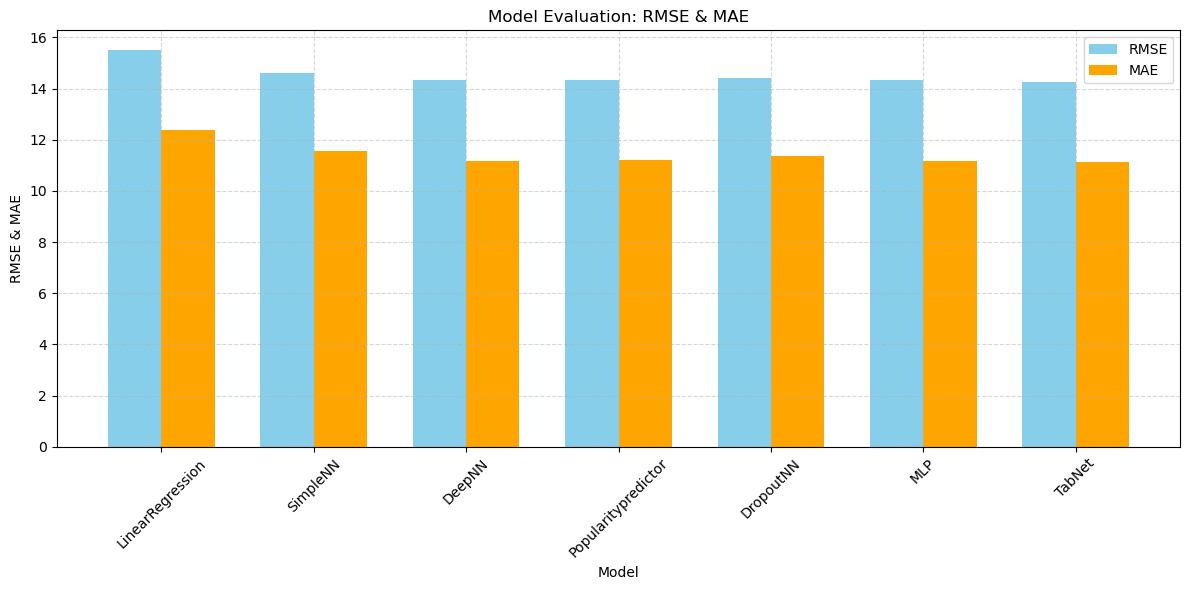

In [73]:
#Plot RMSE and MAE of different models
models = results_df['Model']
rmse_values = results_df['RMSE']
mae_values = results_df['MAE']

x = np.arange(len(models))  # label locations
width = 0.35  # width of each bar

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, rmse_values, width, label='RMSE', color='skyblue')
plt.bar(x + width/2, mae_values, width, label='MAE', color='orange')

# Labels and title
plt.xlabel('Model')
plt.ylabel('RMSE & MAE')
plt.title('Model Evaluation: RMSE & MAE')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [58]:
# Ploting loss curves
def plot_multiple_loss_curves(loss_histories, model_names):
    plt.figure(figsize=(12, 7))
    for losses, name in zip(loss_histories, model_names):
        plt.plot(losses, label=name)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.ylim(100, 800)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

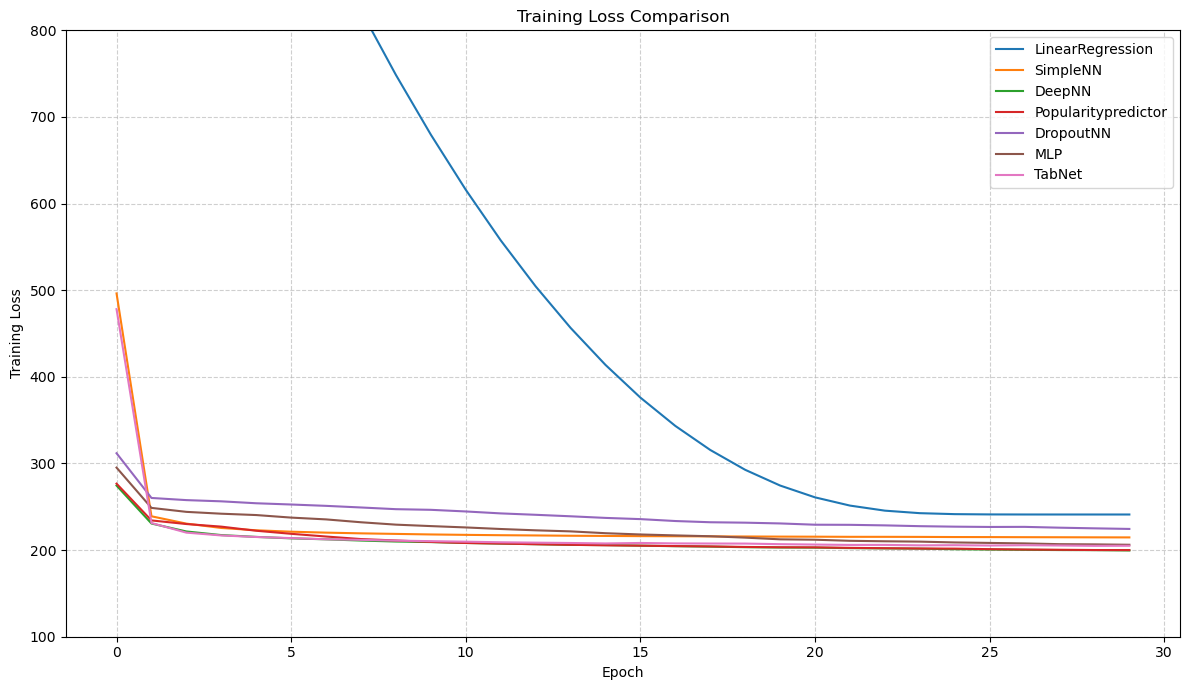

In [59]:
# Plot training loss curves for all models
plot_multiple_loss_curves(train_losses_list, model_names_list)

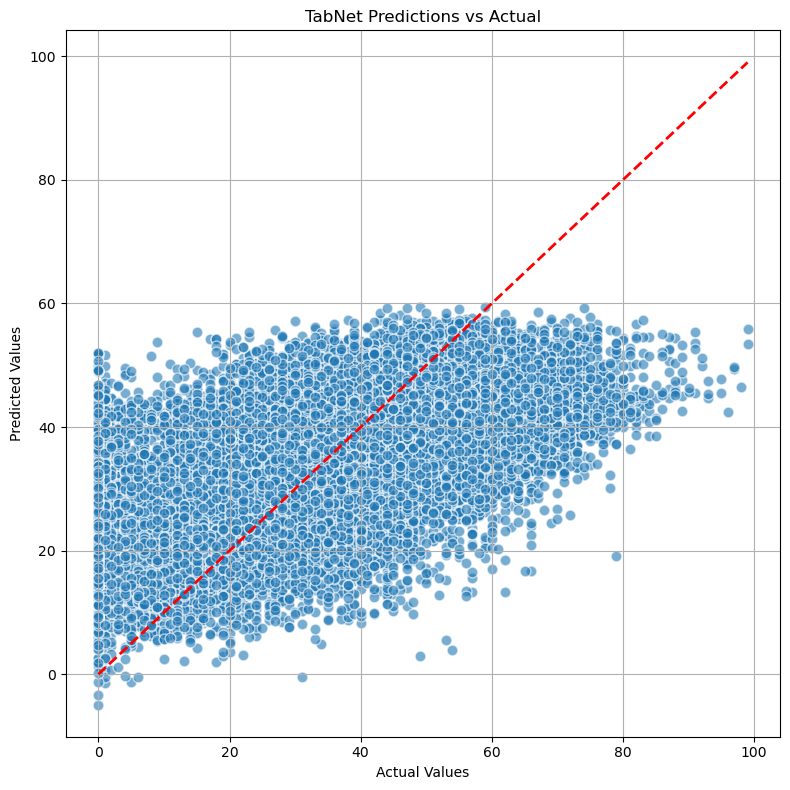

In [62]:
# Predict on validate data with TabNet
if best_model_name == "TabNet":
    y_true = y_val_np.squeeze()
    y_pred = best_model.predict(X_val_np).squeeze()

#Plot predictions Vs Actual of TabNet
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='w', s=60)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("TabNet Predictions vs Actual")
plt.grid(True)
plt.tight_layout()
plt.savefig("my_plot.png") 
plt.show()

## Experimentation 



## Conclusion

In [64]:
import optuna


def objective(trial):
    n_d = trial.suggest_categorical("n_d", [32, 64, 128])
    lr = trial.suggest_float("lr", 1e-3, 2e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
    lambda_sparse = trial.suggest_float("lambda_sparse", 0.0, 1e-2)

    model = TabNetRegressor(
        n_d=n_d,
        n_a=n_d,
        lambda_sparse=lambda_sparse,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=lr),
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        scheduler_params={"step_size":10, "gamma":0.9},
        mask_type='entmax',
        verbose=1
    )

    model.fit(
        X_train=X_train_np, y_train=y_train_np,
        eval_set=[(X_val_np, y_val_np)],
        eval_metric=["rmse"],
        batch_size=batch_size,
        virtual_batch_size=batch_size // 2,
        max_epochs=50,
        patience=10,
        drop_last=False
    )

    preds = model.predict(X_val_np)
    rmse = np.sqrt(mean_squared_error(y_val_np, preds))
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

[I 2025-08-16 13:29:34,330] A new study created in memory with name: no-name-dedf07ad-c9ab-4a79-a6bb-6c33d5d4dfb8
C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 271.22256| val_0_rmse: 14.55685043334961|  0:00:39s
epoch 1  | loss: 214.47804| val_0_rmse: 14.392219543457031|  0:01:21s
epoch 2  | loss: 210.711 | val_0_rmse: 14.350239753723145|  0:02:02s
epoch 3  | loss: 208.14106| val_0_rmse: 14.359800338745117|  0:02:43s
epoch 4  | loss: 206.77806| val_0_rmse: 14.299420356750488|  0:03:23s
epoch 5  | loss: 205.88537| val_0_rmse: 14.230680465698242|  0:04:01s
epoch 6  | loss: 204.23616| val_0_rmse: 14.250709533691406|  0:04:38s
epoch 7  | loss: 203.33121| val_0_rmse: 14.187359809875488|  0:05:19s
epoch 8  | loss: 202.63879| val_0_rmse: 14.261369705200195|  0:06:01s
epoch 9  | loss: 202.32419| val_0_rmse: 14.289719581604004|  0:06:40s
epoch 10 | loss: 200.56431| val_0_rmse: 14.224780082702637|  0:07:22s
epoch 11 | loss: 199.8378| val_0_rmse: 14.238710403442383|  0:08:05s
epoch 12 | loss: 199.05908| val_0_rmse: 14.2227201461792|  0:08:48s
epoch 13 | loss: 198.29647| val_0_rmse: 14.227740287780762|  0:09:27s
epoch 14 | loss: 197.9451

C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-16 13:47:26,701] Trial 0 finished with value: 14.171547889709473 and parameters: {'n_d': 64, 'lr': 0.007131984651369882, 'batch_size': 256, 'lambda_sparse': 0.00244175607453779}. Best is trial 0 with value: 14.171547889709473.
C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 241.32474| val_0_rmse: 14.684610366821289|  0:01:31s
epoch 1  | loss: 218.47281| val_0_rmse: 14.798819541931152|  0:03:05s
epoch 2  | loss: 215.25835| val_0_rmse: 14.559550285339355|  0:04:35s
epoch 3  | loss: 212.75125| val_0_rmse: 14.403340339660645|  0:07:12s
epoch 4  | loss: 210.98588| val_0_rmse: 14.55757999420166|  0:08:47s
epoch 5  | loss: 209.75403| val_0_rmse: 14.323969841003418|  0:10:25s
epoch 6  | loss: 208.71678| val_0_rmse: 14.356300354003906|  0:11:53s
epoch 7  | loss: 207.50871| val_0_rmse: 14.417440414428711|  0:13:21s
epoch 8  | loss: 206.96108| val_0_rmse: 14.650739669799805|  0:14:56s
epoch 9  | loss: 205.58442| val_0_rmse: 14.429869651794434|  0:16:21s
epoch 10 | loss: 204.25575| val_0_rmse: 14.237689971923828|  0:17:56s
epoch 11 | loss: 203.45189| val_0_rmse: 14.242819786071777|  0:19:32s
epoch 12 | loss: 202.01832| val_0_rmse: 14.365570068359375|  0:21:07s
epoch 13 | loss: 201.19891| val_0_rmse: 14.312350273132324|  0:22:44s
epoch 14 | loss: 200.

[W 2025-08-16 14:24:26,487] Trial 1 failed with parameters: {'n_d': 128, 'lr': 0.014821156808494966, 'batch_size': 128, 'lambda_sparse': 0.0011195766182993995} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\jenee\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\jenee\AppData\Local\Temp\ipykernel_16348\1470075842.py", line 21, in objective
    model.fit(
  File "C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py", line 258, in fit
    self._train_epoch(train_dataloader)
  File "C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py", line 489, in _train_epoch
    batch_logs = self._train_batch(X, y)
                 ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py", line 534, in _train_batch
    loss.backward()
 

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold

X_np = np.concatenate((X_train_np, X_val_np), axis=0)
y_np = np.concatenate((y_train_np, y_val_np), axis=0)

def objective(trial):
    n_d = trial.suggest_categorical("n_d", [32, 64])
    lr = trial.suggest_float("lr", 1e-3, 5e-3, log=True)
    batch_size = trial.suggest_categorical("batch_size", [128, 256])
    lambda_sparse = trial.suggest_float("lambda_sparse", 0.0, 1e-2)

    # Set up K-Fold cross-validation
    kf = KFold(n_splits=2, shuffle=True, random_state=12345)
    rmses = []

    for train_index, val_index in kf.split(X_np):
        X_train_cv, X_val_cv = X_np[train_index], X_np[val_index]
        y_train_cv, y_val_cv = y_np[train_index], y_np[val_index]

        model = TabNetRegressor(
            n_d=n_d,
            n_a=n_d,
            lambda_sparse=lambda_sparse,
            optimizer_fn=torch.optim.Adam,
            optimizer_params=dict(lr=lr),
            scheduler_fn=torch.optim.lr_scheduler.StepLR,
            scheduler_params={"step_size": 10, "gamma": 0.9},
            mask_type='entmax',
            verbose=1  
        )

        model.fit(
            X_train=X_train_cv, y_train=y_train_cv,
            eval_set=[(X_val_cv, y_val_cv)],
            eval_metric=["rmse"],
            batch_size=batch_size,
            virtual_batch_size=batch_size // 2,
            max_epochs=30,
            patience=5,
            drop_last=False
        )

        preds = model.predict(X_val_cv)
        rmse = np.sqrt(mean_squared_error(y_val_cv, preds))
        rmses.append(rmse)

    return np.mean(rmses)

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10,n_jobs=2)

print("Best params:", study.best_params)
print("Best RMSE (CV Avg):", study.best_value)

In [ ]:
#Training the final model using best parameters
# Combine training and validation data
X_train_new = np.vstack([X_train_np, X_val_np])
y_train_new = np.vstack([y_train_np, y_val_np])

# Extract best params
best_params = study.best_params

# Train final TabNet model
final_tabnet_model = TabNetRegressor(
    n_d=best_params["n_d"],
    n_a=best_params["n_d"],
    lambda_sparse=best_params["lambda_sparse"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params["lr"]),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size": 10, "gamma": 0.9},
    mask_type='entmax',
    verbose=1
)

final_tabnet_model.fit(
    X_train=X_train_new, y_train=y_train_new,
    eval_metric=["rmse"],
    max_epochs=50,
    patience=10,
    batch_size=best_params["batch_size"],
    virtual_batch_size=best_params["batch_size"] // 2,
    drop_last=False
)

In [ ]:
#Evaluvate on test set
y_pred_test = final_tabnet_model.predict(X_test_np).squeeze()
rmse = np.sqrt(mean_squared_error(y_test_np.squeeze(), y_pred_test))
mae = mean_absolute_error(y_test_np.squeeze(), y_pred_test)

print(f"Final Model on Test Set — RMSE: {rmse:.4f}, MAE: {mae:.4f}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test_np, y_pred_test, alpha=0.6, edgecolors='w', s=60)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TabNet Final Model: Actual vs Predicted on Test Set")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
feature_importances = tabnet.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(10))

In [ ]:
feat_importance = final_tabnet_model.feature_importances_
feature_names = [...]  # List of your feature column names
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feat_importance
}).sort_values(by="Importance", ascending=False)

print(importance_df)

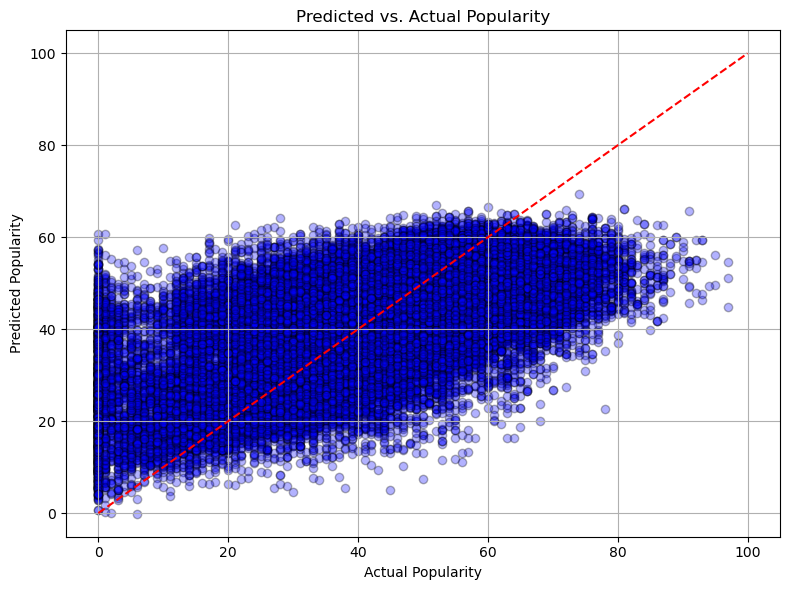

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.3, color='blue', edgecolors='k')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Predicted vs. Actual Popularity")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
configs = [
    {'hidden_sizes': [128, 64], 'lr': 0.001, 'batch_size': 64, 'dropout': 0.0},
    {'hidden_sizes': [256, 128, 64], 'lr': 0.0005, 'batch_size': 128, 'dropout': 0.2},
    {'hidden_sizes': [64, 32], 'lr': 0.001, 'batch_size': 32, 'dropout': 0.3},
    {'hidden_sizes': [512, 256, 128], 'lr': 0.0003, 'batch_size': 64, 'dropout': 0.4},
]

In [20]:
class FlexibleNet(nn.Module):
    def __init__(self, input_dim, hidden_sizes, dropout):
        super(FlexibleNet, self).__init__()
        layers = []
        in_size = input_dim
        for h in hidden_sizes:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            if dropout > 0:
                layers.append(nn.Dropout(dropout))
            in_size = h
        layers.append(nn.Linear(in_size, 1))  # Output layer
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [21]:
results = []

for idx, cfg in enumerate(configs):
    print(f"\n Running config {idx + 1}: {cfg}")
    
    # Create dataset and loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=cfg['batch_size'], shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=cfg['batch_size'], shuffle=False)

    # Initialize model
    model = FlexibleNet(input_dim, cfg['hidden_sizes'], cfg['dropout'])

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=cfg['lr'])

    # Training loop
    for epoch in range(10):  # Fewer epochs for quick comparison
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor).squeeze().numpy()
        y_true = y_test_tensor.numpy()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"  RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    results.append({'config': cfg, 'rmse': rmse, 'mae': mae})


 Running config 1: {'hidden_sizes': [128, 64], 'lr': 0.001, 'batch_size': 64, 'dropout': 0.0}
  RMSE: 14.68, MAE: 11.61

 Running config 2: {'hidden_sizes': [256, 128, 64], 'lr': 0.0005, 'batch_size': 128, 'dropout': 0.2}
  RMSE: 14.61, MAE: 11.47

 Running config 3: {'hidden_sizes': [64, 32], 'lr': 0.001, 'batch_size': 32, 'dropout': 0.3}
  RMSE: 14.93, MAE: 11.84

 Running config 4: {'hidden_sizes': [512, 256, 128], 'lr': 0.0003, 'batch_size': 64, 'dropout': 0.4}
  RMSE: 14.61, MAE: 11.50


In [22]:
# Sort by RMSE
results_sorted = sorted(results, key=lambda x: x['rmse'])

print("\n🏆 Best Configurations:")
for r in results_sorted:
    print(f"Config: {r['config']}, RMSE: {r['rmse']:.2f}, MAE: {r['mae']:.2f}")


🏆 Best Configurations:
Config: {'hidden_sizes': [256, 128, 64], 'lr': 0.0005, 'batch_size': 128, 'dropout': 0.2}, RMSE: 14.61, MAE: 11.47
Config: {'hidden_sizes': [512, 256, 128], 'lr': 0.0003, 'batch_size': 64, 'dropout': 0.4}, RMSE: 14.61, MAE: 11.50
Config: {'hidden_sizes': [128, 64], 'lr': 0.001, 'batch_size': 64, 'dropout': 0.0}, RMSE: 14.68, MAE: 11.61
Config: {'hidden_sizes': [64, 32], 'lr': 0.001, 'batch_size': 32, 'dropout': 0.3}, RMSE: 14.93, MAE: 11.84


In [29]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze().numpy()
    y_true = y_test_tensor.numpy()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"MLP RMSE: {rmse:.2f}")
print(f"MLP MAE: {mae:.2f}")

MLP RMSE: 14.46
MLP MAE: 11.37


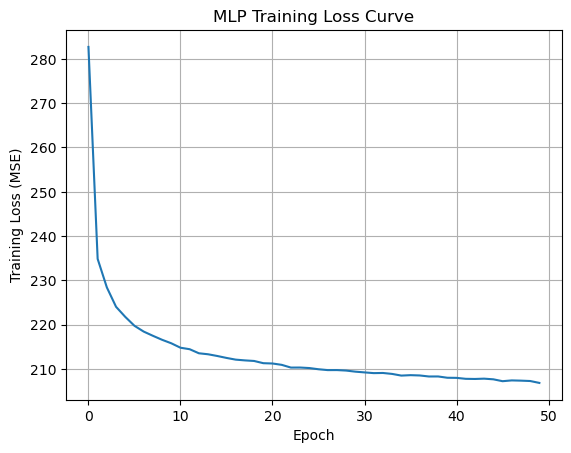

In [30]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("MLP Training Loss Curve")
plt.grid(True)
plt.show()

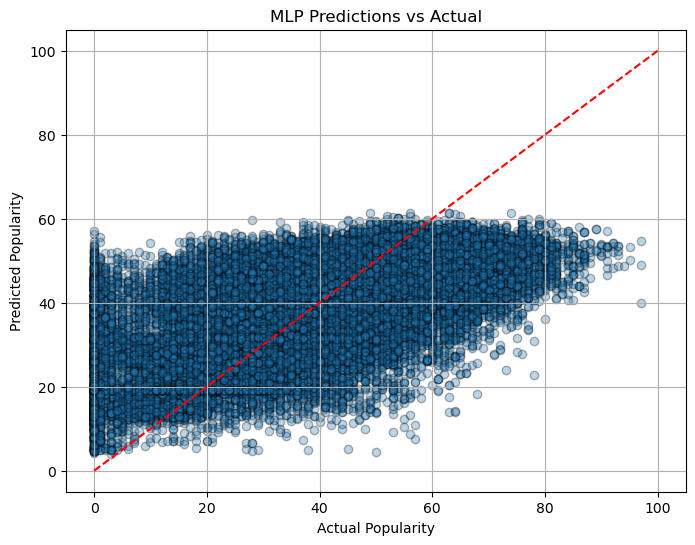

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.3, edgecolors='k')
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("MLP Predictions vs Actual")
plt.grid(True)
plt.show()

In [31]:



tabnet = TabNetRegressor(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5,
    n_independent=2,
    n_shared=2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax'  # can be 'sparsemax'
)

tabnet.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_name=["test"],
    eval_metric=["rmse"],
    max_epochs=10,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 59.65781| test_rmse: 2.001849889755249|  0:00:47s
epoch 1  | loss: 4.5726  | test_rmse: 1.0397900342941284|  0:01:33s
epoch 2  | loss: 4.44495 | test_rmse: 1.5531100034713745|  0:02:28s
epoch 3  | loss: 3.21869 | test_rmse: 1.3715399503707886|  0:03:17s
epoch 4  | loss: 4.45865 | test_rmse: 2.150899887084961|  0:04:14s
epoch 5  | loss: 3.18502 | test_rmse: 1.2737499475479126|  0:05:09s
epoch 6  | loss: 2.5747  | test_rmse: 0.7939900159835815|  0:06:01s
epoch 7  | loss: 2.99911 | test_rmse: 0.9322999715805054|  0:06:53s
epoch 8  | loss: 2.77641 | test_rmse: 0.6238800287246704|  0:07:47s
epoch 9  | loss: 2.51895 | test_rmse: 1.6477899551391602|  0:08:42s
Stop training because you reached max_epochs = 10 with best_epoch = 8 and best_test_rmse = 0.6238800287246704


C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [35]:
preds = tabnet.predict(X_test_np).flatten()
rmse = np.sqrt(mean_squared_error(y_test_np, preds))
mae = mean_absolute_error(y_test_np, preds)

print(f"TabNet RMSE: {rmse:.2f}")
print(f"TabNet MAE: {mae:.2f}")

TabNet RMSE: 0.62
TabNet MAE: 0.48


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, preds, alpha=0.3, edgecolors='k')
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("TabNet Predictions vs Actual")
plt.grid(True)
plt.show()

In [ ]:
feature_importances = tabnet.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(10))

In [38]:
pip install optuna

In [40]:
import optuna

def objective(trial):
    n_d = trial.suggest_categorical("n_d", [32, 64, 128])
    lr = trial.suggest_float("lr", 1e-3, 2e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
    lambda_sparse = trial.suggest_float("lambda_sparse", 0.0, 1e-2)

    model = TabNetRegressor(
        n_d=n_d,
        n_a=n_d,
        lambda_sparse=lambda_sparse,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=lr),
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        scheduler_params={"step_size":10, "gamma":0.9},
        mask_type='entmax',
        verbose=0
    )

    model.fit(
        X_train=X_train_np, y_train=y_train_np,
        eval_set=[(X_test_np, y_test_np)],
        eval_metric=["rmse"],
        batch_size=batch_size,
        virtual_batch_size=batch_size // 2,
        max_epochs=50,
        patience=10,
        drop_last=False
    )

    preds = model.predict(X_test_np)
    rmse = np.sqrt(mean_squared_error(y_test_np, preds))
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

[I 2025-08-15 16:43:20,615] A new study created in memory with name: no-name-993c1a84-04d0-4f48-9ace-b65f3bb78928



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_rmse = 0.21768000721931458


C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[W 2025-08-15 17:43:45,855] Trial 0 failed with parameters: {'n_d': 64, 'lr': 0.001329644156186324, 'batch_size': 256, 'lambda_sparse': 0.0011694247248182211} because of the following error: NameError("name 'X_valid_np' is not defined").
Traceback (most recent call last):
  File "C:\Users\jenee\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\jenee\AppData\Local\Temp\ipykernel_12716\1817313571.py", line 32, in objective
    preds = model.predict(X_valid_np)
                          ^^^^^^^^^^
NameError: name 'X_valid_np' is not defined
[W 2025-08-15 17:43:45,865] Trial 0 failed with value None.


NameError: name 'X_valid_np' is not defined

In [ ]:


plt.plot(tabnet.history['loss'], label='Train Loss')
plt.plot(tabnet.history['test_rmse'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

class DeepNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

class Popularitypredictor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.output(x)

class DropoutNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        return self.output(x)

# ---------------------------
# Training function
# ---------------------------

def train_model(model, train_loader, criterion, optimizer, num_epochs=30):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * X_batch.size(0)
        epoch_loss /= len(train_loader.dataset)
        train_losses.append(epoch_loss)
    return train_losses

# ---------------------------
# Evaluation function
# ---------------------------

def evaluate_model(model, X_test_tensor, y_test_tensor):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor).squeeze().cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# ---------------------------
# Training + Evaluation Loop
# ---------------------------

def train_and_evaluate_all_models(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, batch_size=64):
    input_dim = X_train_tensor.shape[1]

    model_classes = {
        "LinearRegression": LinearRegressionModel,
        "SimpleNN": SimpleNN,
        "DeepNN": DeepNN,
        "Popularitypredictor": Popularitypredictor,
        "DropoutNN": DropoutNN,
        "MLP": MLP
    }

    results = []

    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)

    for name, model_class in model_classes.items():
        print(f"\n🔧 Training {name}...")
        model = model_class(input_dim)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        train_model(model, train_loader, criterion, optimizer, num_epochs=30)
        rmse, mae = evaluate_model(model, X_test_tensor, y_test_tensor)

        print(f"✅ {name} RMSE: {rmse:.4f}, MAE: {mae:.4f}")
        results.append({"Model": name, "RMSE": rmse, "MAE": mae})

    return pd.DataFrame(results)

# ---------------------------
# Example usage
# ---------------------------

# X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor must be defined

results_df = train_and_evaluate_all_models(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
print("\n📊 Final Results:\n", results_df)

# Plot
results_df.set_index("Model")[["RMSE", "MAE"]].plot(kind="bar", figsize=(10, 6), title="Model Performance")
plt.ylabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()


🔧 Training LinearRegression...
✅ LinearRegression RMSE: 15.4639, MAE: 12.3202

🔧 Training SimpleNN...
✅ SimpleNN RMSE: 14.4924, MAE: 11.4160

🔧 Training DeepNN...
✅ DeepNN RMSE: 14.2756, MAE: 11.1475

🔧 Training Popularitypredictor...
